In [1]:
!pip install -q opencv-python easyocr timm torch torchvision pillow


In [2]:
import os
import cv2
import torch
import easyocr
import numpy as np
from PIL import Image
from timm import create_model
from torchvision import transforms
from IPython.display import display, clear_output


In [12]:
BASE_DIR = "labels"

CLASS_NAMES = ["food", "medicine", "cosmetics"]


In [13]:
for cls in os.listdir(BASE_DIR):
    print(f"\nClass: {cls}")
    for img in os.listdir(os.path.join(BASE_DIR, cls)):
        print(" ", img)



Class: cosmetics
  Screenshot 2026-01-05 140342.png
  Screenshot 2026-01-05 140421.png

Class: food
  Screenshot 2026-01-05 141153.png
  Screenshot 2026-01-05 141341.png

Class: medicine
  Screenshot 2026-01-05 140555.png
  Screenshot 2026-01-05 141004.png


In [14]:
reader = easyocr.Reader(['en'], gpu=False)


Using CPU. Note: This module is much faster with a GPU.


In [15]:
vit = create_model("vit_base_patch16_224", pretrained=True)
vit.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


In [20]:
def process_image(image_path):
    # Load image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (700, 500))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # ---------- OCR ----------
    ocr_results = reader.readtext(img_rgb)
    extracted_text = " ".join([res[1] for res in ocr_results])

    # ---------- ViT ----------
    vit_input = transform(Image.fromarray(img_rgb)).unsqueeze(0)
    with torch.no_grad():
        output = vit(vit_input)
        pred_class = torch.argmax(output).item()

    print("ViT Raw Predicted Class ID (ImageNet):", pred_class)
    print("\nOCR Extracted Text (partial):")
    print(extracted_text[:400], "...\n")

    display(Image.fromarray(img_rgb))


ViT Raw Predicted Class ID (ImageNet): 916

OCR Extracted Text (partial):
FAMILY SIZEI Nutrition Facts about 16 servings per container Oreo Serving size 3 cookies (34g) mouniner <emuino Calories 160 Ingredients: UNBLEACHED Enriched Rour MWHEAT rovr_NIACIN Aoailu Velue REDUCED IRON, THIAMINE MONONITRATE  (VITAMIN TCABoL" RIBOFLAMIN Total Fat 7q 980 NVMAMIN B2], FOUC ALcD} Sugar; Pau Alidior 0Il; cocoa IprocESSED Wnh high Frucvose corn SvrupLEAVENING Saturated Fat 20 1089 ...



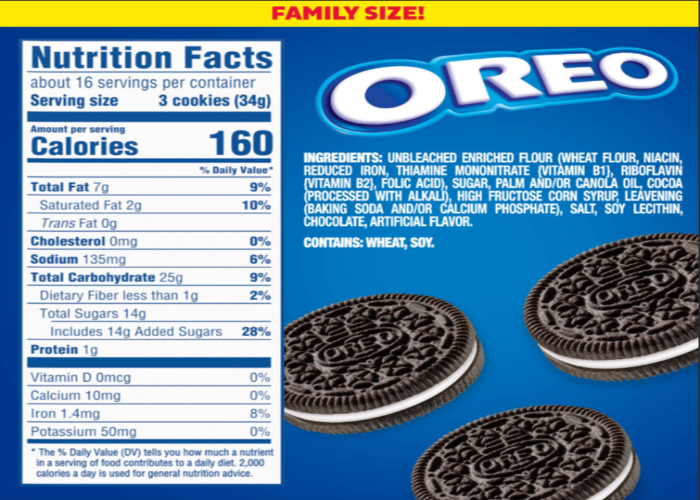

In [21]:
process_image("labels/food/Screenshot 2026-01-05 141153.png")


Actual Class: food | Image: Screenshot 2026-01-05 141153.png
ViT Raw Predicted Class ID (ImageNet): 916

OCR Extracted Text (partial):
FAMILY SIZEI Nutrition Facts about 16 servings per container Oreo Serving size 3 cookies (34g) mouniner <emuino Calories 160 Ingredients: UNBLEACHED Enriched Rour MWHEAT rovr_NIACIN Aoailu Velue REDUCED IRON, THIAMINE MONONITRATE  (VITAMIN TCABoL" RIBOFLAMIN Total Fat 7q 980 NVMAMIN B2], FOUC ALcD} Sugar; Pau Alidior 0Il; cocoa IprocESSED Wnh high Frucvose corn SvrupLEAVENING Saturated Fat 20 1089 ...



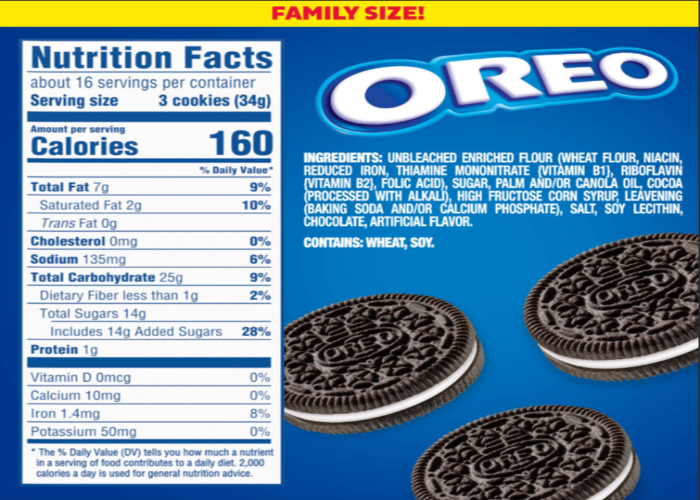

Actual Class: food | Image: Screenshot 2026-01-05 141341.png
ViT Raw Predicted Class ID (ImageNet): 692

OCR Extracted Text (partial):
NET WeIGHT: 246 9 Marie Light QPod6-12891 DATCH NO : PKD usc@ve stont cool dat lacE TAicenor TORTEEDBACLCOMPLAINcomac And IC CRES PQ B0LL0L9 BENGALUR Stodos Eitccaresltcin €1003s Luquuiguaaaniltd MGREDIENTS   Retined Wheat Aour [Vida) (66 Suc1. Sugat; Refred Paln Oi; Inutnt Eatsing  [INS sosio]; INS sccca INs 4scui Soleds; Iodcred Solt Faur treatrent eeent (5 2230 Mature tacntica| Ilavouring  subs ...



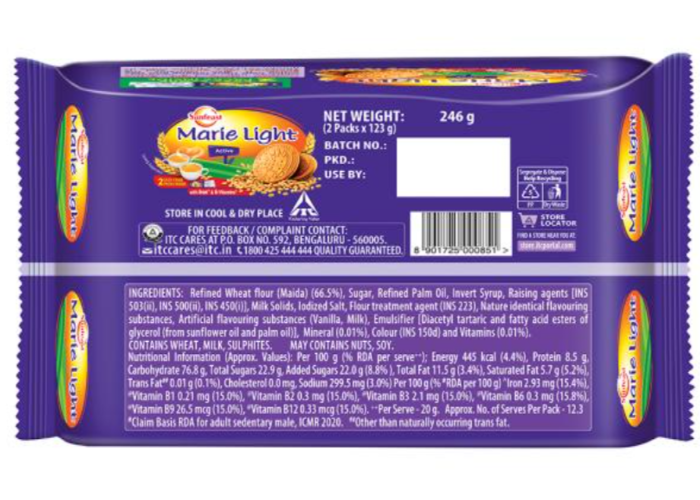

Actual Class: medicine | Image: Screenshot 2026-01-05 140555.png
ViT Raw Predicted Class ID (ImageNet): 922

OCR Extracted Text (partial):
0300-088 Eoxh ulauled loblul curalna Geneuty 45u Deaoqo Fuu Brina Trucon % Sloru (n 4n dork Ploru. Tpa= An 34edin930 € Oai dcd alyde preukhed Eia LCN> M8c0012 Neribn (a-nnd Marth g] Faed 1 Landne oeu Tp aaaa LGA_MarG4 1 Dele-654 ST-[40 Dolo-6s0 Paracetomol Tablets IP 1 Dole-650 3ah Eoch uncooled tablct conloins: 1 ParotetotoaP 630 ma- Dozjge: Fs diiectedby tke Physkian 2 SteeIn 0 d, * Bork plort K ...



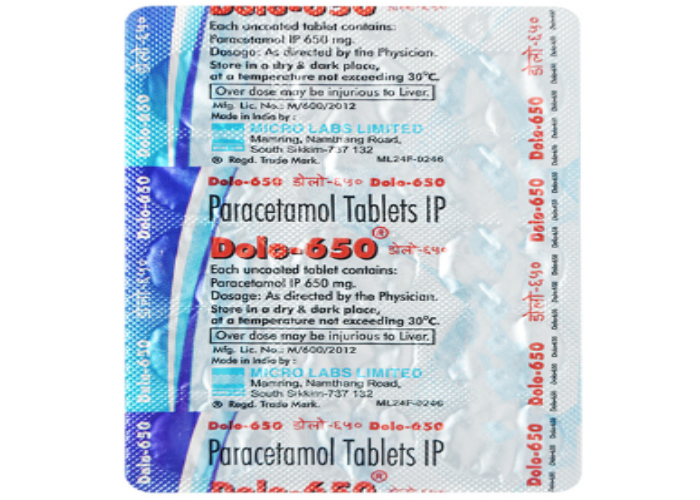

Actual Class: medicine | Image: Screenshot 2026-01-05 141004.png
ViT Raw Predicted Class ID (ImageNet): 916

OCR Extracted Text (partial):
NDC 62713-903-01 Homeopalhc Auabdall WHLL 1 W W 1 2 1 8 L Reliet 6 1 1 1 H L L % H 2 Yor 150 1 1 Il # 1 HHP WMeeds & Ghasses" 8  Ji  Ib 4 L 1 1 1 E Daweke Mewnding 6 } { 1 1 1 # 1 H 3 Texas Cedar H [ 1 1 1 8 1 1 H L 1 # 1 "k M Jkm 1 1 1 H E 1 H I 2 90 Quick Dissotving Chewables 1 L Allergy  1 Trees  1 [ 1 1 ...



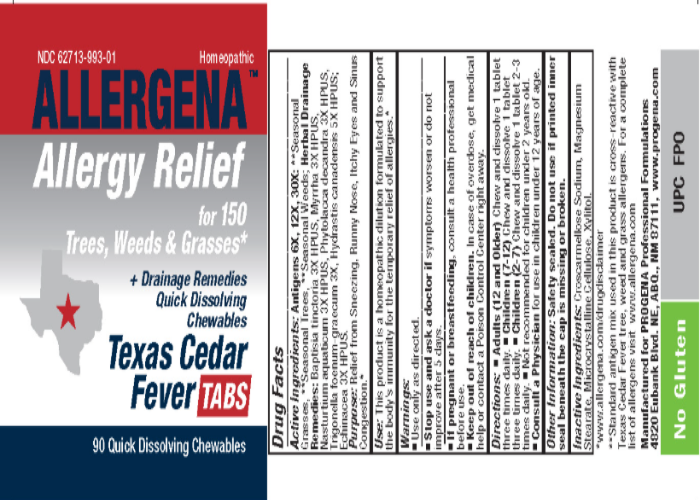

Actual Class: cosmetics | Image: Screenshot 2026-01-05 140342.png
ViT Raw Predicted Class ID (ImageNet): 692

OCR Extracted Text (partial):
S= CHANDRIKA AYURVEDIC SOAP Chandrika truly deserves to be called the Real Ayurvedic soap: As compared t0 other natural soaps Chandrika nas more than HAND MADE double the amount of coconut oil and ayurvedic herbs. which gently treat skin problems for dear; beautiful skin: Orange Balances oil secretion Patchouli Prevents dark spots Palmarosa Keeps skin moisturized Cinnamon Leaf Removes blemishes Wi ...



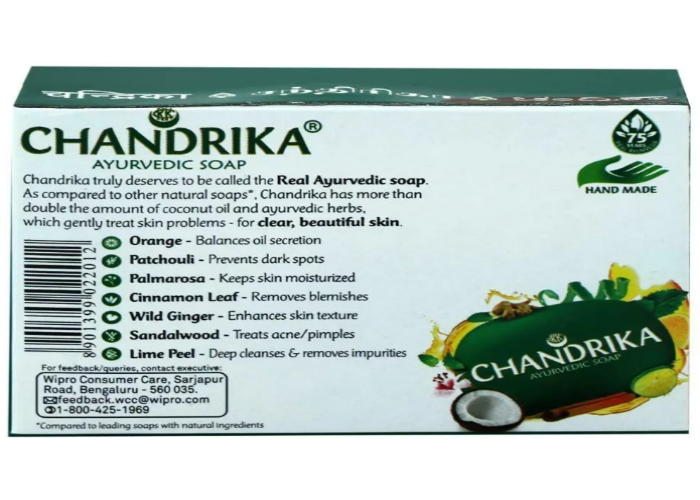

Actual Class: cosmetics | Image: Screenshot 2026-01-05 140421.png
ViT Raw Predicted Class ID (ImageNet): 720

OCR Extracted Text (partial):
TEE Hude Ina Totet Inckanve 04l8 MFD MaP: NeT WT: WHEN PACKED:  100 @ Surlou frtrne Frou DATE Of MaNufACTURE RR [USE BEFORE 36 VontrS Home Car Rxt Lid Mfd_ Br: Wo Personaland Hall 1421.24-27, Suner NaJ08 Gener  Par Patka; Teangat# 501 352 DstEL Ring1tooy 4d MR kd 4H License No TS Ra7020-60137 Entepies @LId , Doddsknte Wenena Bre ipo 560,035.KA Suaou Roed BAnJIv Tobee cled eote Cre Sapeprr Road Oik ...



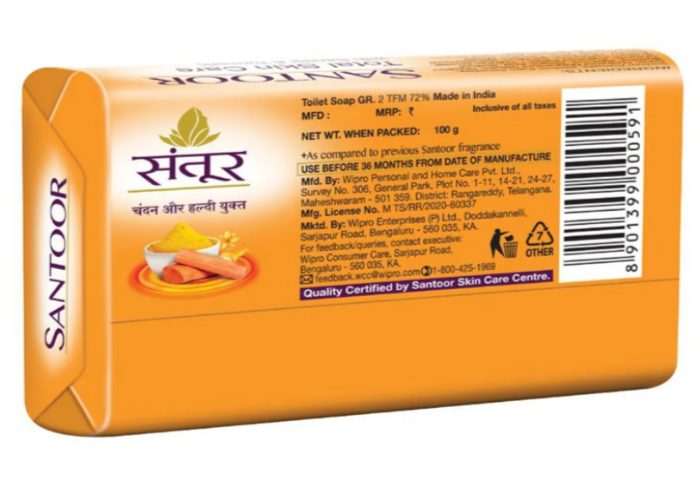

In [22]:
for cls in CLASS_NAMES:
    folder = f"{BASE_DIR}/{cls}"
    for img_name in os.listdir(folder):
        print("="*60)
        print(f"Actual Class: {cls} | Image: {img_name}")
        process_image(f"{folder}/{img_name}")
